In [13]:
import pandas as pd

1. 데이터 로드 및 요약

In [14]:
df=pd.read_csv('../data/fetal_health.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

2. 데이터 결측치 / 중복값 체크 ++ 타겟 클래스 불균형 여부 확인

In [15]:
print(df.isna().sum())


baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [16]:
print(df.duplicated().sum())

13


In [17]:
df['fetal_health'].value_counts(normalize=True)

fetal_health
1.0    0.778457
2.0    0.138758
3.0    0.082785
Name: proportion, dtype: float64

결측치는 존재하지 않고, 중복된 값도 데이터 수에 비하면 매우 작은 수준이지만, 클래스 불균형이 존재한다. (모델 학습에 주요한 영향을 끼침)

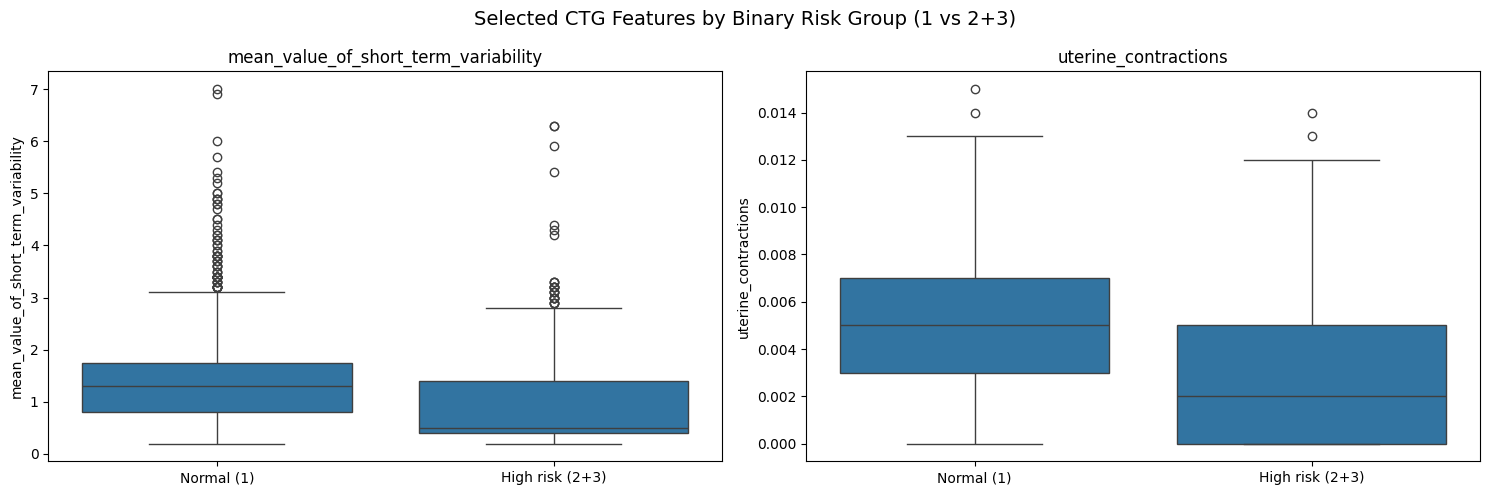

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

cp=pd.read_csv('../data/fetal_health.csv')

cp["risk_binary"] = (cp["fetal_health"] >= 2).astype(int)

cp["risk_group"] = cp["risk_binary"].map({
    0: "Normal (1)",
    1: "High risk (2+3)"
})

cp["risk_group"] = pd.Categorical(cp["risk_group"],
                                  categories=["Normal (1)", "High risk (2+3)"],
                                  ordered=True)

features = [
    "mean_value_of_short_term_variability",
    "uterine_contractions"
]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for ax, feat in zip(axes, features):
    sns.boxplot(
        data=cp,
        x="risk_group",
        y=feat,
        ax=ax
    )
    ax.set_title(feat)
    ax.set_xlabel("")
    ax.set_ylabel(feat)

plt.suptitle("Selected CTG Features by Binary Risk Group (1 vs 2+3)", fontsize=14)
plt.tight_layout()
plt.show()


몇몇 feature가 fetal health 수준의 결정에 유의미한 영향을 주기에, logistic 모델로 주요 feature가 무엇인지, xgboost로 feature을 종합하여 임상 특성들로 태아의 병을 진단하는 모델의 최고 성능은 어느 수준인지 알아보도록 하자.